Please enter the news article url:  https://www.lefigaro.fr/actualite-france/au-rassemblement-national-on-n-est-pas-anti-etrangers-on-est-pro-francais-revendique-matthieu-valet-20240409
Please enter the language (english, hindi, etc.):  french



Stopwords for Selected Languge {'eus', 'ayez', 'ils', 'seraient', 'pas', 'eurent', 'étaient', 'ayante', 'il', 'serais', 'avais', 'à', 'd', 'étante', 'fut', 'aurait', 'te', 'eût', 'tes', 'étée', 'était', 'son', 'aurions', 'seras', 'qui', 'auriez', 'avions', 'as', 'aurez', 'étants', 'fussiez', 'serait', 'ai', 'ma', 'furent', 'aies', 'eue', 'eut', 'serez', 'suis', 'm', 'ne', 'du', 'eusse', 'est', 'lui', 'par', 'moi', 'le', 'nous', 'leur', 'été', 'fusse', 'soyons', 'étiez', 'des', 'y', 'je', 'avaient', 't', 'mes', 'et', 'les', 'une', 'au', 'avez', 'sommes', 'qu', 'mon', 'l', 'avec', 'ayant', 'me', 'elle', 'un', 'ses', 'serai', 'fus', 'eues', 'mais', 'même', 'étées', 'dans', 'soit', 'soient', 'en', 'serions', 'auraient', 'la', 'votre', 'se', 'fûmes', 'êtes', 'soyez', 'aurons', 'ces', 'ou', 'ayantes', 'étais', 'ont', 'que', 'eûtes', 'sont', 'seriez', 'serons', 'sera', 'on', 'es', 'aviez', 'ait', 'étantes', 'fûtes', 'eussions', 'fussions', 'eux', 'tu', 'pour', 'eusses', 'avons', 'avait', 'ay

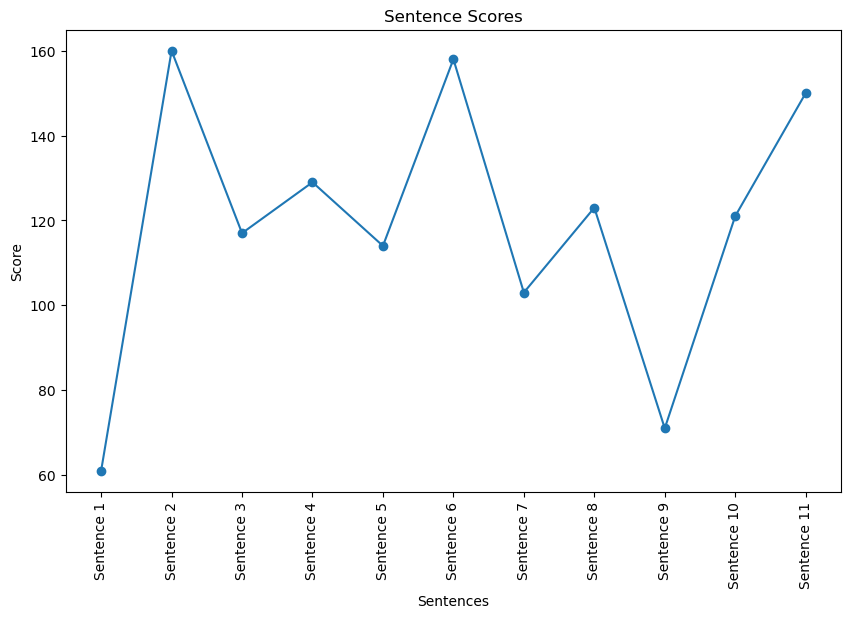


The average sentence value:  118

 The Final Summary
  «J’ai la fierté de rejoindre le grand mouvement populaire de Marine Le Pen et Jordan Bardella », a déclaré ce mardi matin sur Europe 1 Matthieu Valet, ancien patron du syndicat de police SICP, qui sera présent sur la liste du Rassemblement national pour les élections européennes. Au RN, «on peut venir d'ailleurs et venir d'ici : Jordan Bardella a des origines italiennes, Malika Sorel a des origines algériennes, moi j'ai des origines espagnoles», a-t-il ajouté vantant les choix de «Marine Le Pen et Jordan Bardella» qui portent les parcours de «ceux qui se sont assimilés, de ceux qui ont toujours, à la sueur de leur front, monté l’escalier social de cette république». «Après l'affaire Nahel , lors de laquelle la présomption d’innocence de ce policier Florian qui a donné et consacré toute sa vie à la République a été sacrifiée sur l’autel de la paix sociale, le président a eu le déshonneur et la guerre», a également dénoncé l’ancien 

In [17]:
from newspaper import Article
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
import nltk
#nltk.download('punkt')

def summarize_news(url, language):
    # Download the article from the url
    article = Article(url)
    article.download()
    article.parse()

    # Tokenize the article text
    stopWords = set(stopwords.words(language))
    print("\nStopwords for Selected Languge",stopWords)
    words = word_tokenize(article.text)

    # Create the frequency table
    freqTable = dict()
    for word in words:
        word = word.lower()
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    # Score the sentences
    sentences = sent_tokenize(article.text)
    sentenceValue = dict()

    for sentence in sentences:
        for word, freq in freqTable.items():
            if word in sentence.lower():
                if sentence in sentenceValue:
                    sentenceValue[sentence] += freq
                else:
                    sentenceValue[sentence] = freq

    for sentence, score in sentenceValue.items():
        print(f"Sentence: {sentence}\nScore: {score}\n")


     # Create labels for sentences
    labels = [f"Sentence {i+1}" for i in range(len(sentenceValue))]
    
    # Get scores
    scores = list(sentenceValue.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(labels, scores, marker='o')
    plt.xlabel('Sentences')
    plt.ylabel('Score')
    plt.title('Sentence Scores')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.show()

    
    # Find the average score for the sentences
    sumValues = 0
    for sentence in sentenceValue:
        sumValues += sentenceValue[sentence]

    average = int(sumValues / len(sentenceValue))
    print("\nThe average sentence value: ",average)

    # Generate the summary
    summary = ''
    for sentence in sentences:
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
            summary += " " + sentence
    return summary

# Test the function with a news article url
url = input("Please enter the news article url: ")
language = input("Please enter the language (english, hindi, etc.): ")
print("\n The Final Summary\n", summarize_news(url, language))

Please enter the news article url:  https://www.lefigaro.fr/actualite-france/au-rassemblement-national-on-n-est-pas-anti-etrangers-on-est-pro-francais-revendique-matthieu-valet-20240409

Please enter the language (english, french, dutch, german):  french


Sentence: The former spokesperson and national secretary of the SICP police union officially announced on Europe 1 that he was joining the flame party in view of the European elections.
Score: 51

Sentence: “I am proud to join the great popular movement of Marine Le Pen and Jordan Bardella,” declared this Tuesday morning on Europe 1 Matthieu Valet, former boss of the police union SICP, who will be present on the list of the National Rally for the European elections.
Score: 147

Sentence: After the rallying of the former boss of Frontex, Fabrice Leggeri, then the essayist and demographer Malika Sorel in second place behind Jordan Bardella, it is now the turn of the former police officer to join the RN to lead the battle Europeans.
Score: 98

Sentence: “This great popular movement [...] is the only party which has the courage to defend all French people of heart and mind”, he notably affirmed, insisting in this first political interview on its modest origins and its course.
Score: 112

S

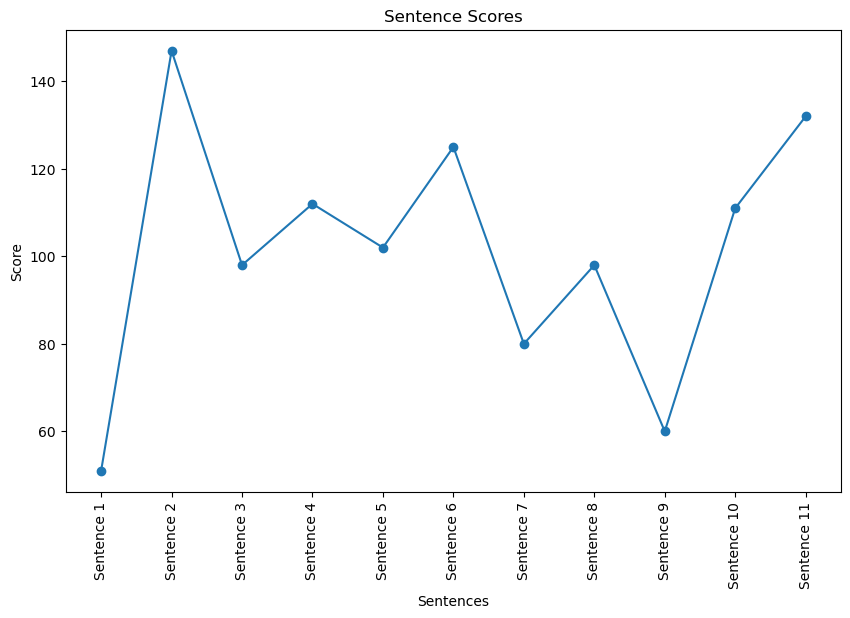


The average sentence value:  101

 The Final Summary
  “I am proud to join the great popular movement of Marine Le Pen and Jordan Bardella,” declared this Tuesday morning on Europe 1 Matthieu Valet, former boss of the police union SICP, who will be present on the list of the National Rally for the European elections. At the RN, “we can come from elsewhere and come from here: Jordan Bardella has Italian origins, Malika Sorel has Algerian origins, I have Spanish origins,” he added, praising the choices of “ Marine Le Pen and Jordan Bardella” who carry the journeys of “those who have assimilated, of those who have always, through the sweat of their brow, climbed the social ladder of this republic”. “After the Nahel affair, during which the presumption of innocence of this police officer Florian who gave and devoted his entire life to the Republic was sacrificed on the altar of social peace, the president suffered dishonor and war”, also denounced the former head of the BAC of Val-de-Marn

In [11]:
from newspaper import Article
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
import nltk
from googletrans import Translator
import matplotlib.pyplot as plt
#nltk.download('punkt')

def summarize_news(url, language):
    # Download the article from the url
    article = Article(url)
    article.download()
    article.parse()

    # Translate the article to English if it's not in English
    if language != 'english':
        translator = Translator()
        translation = translator.translate(article.text, dest='english')
        text = translation.text
    else:
        text = article.text

    # Tokenize the article text
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(text)

    # Create the frequency table
    freqTable = dict()
    for word in words:
        word = word.lower()
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    # Score the sentences
    sentences = sent_tokenize(text)
    sentenceValue = dict()

    for sentence in sentences:
        for word, freq in freqTable.items():
            if word in sentence.lower():
                if sentence in sentenceValue:
                    sentenceValue[sentence] += freq
                else:
                    sentenceValue[sentence] = freq

    for sentence, score in sentenceValue.items():
        print(f"Sentence: {sentence}\nScore: {score}\n")

    # Create labels for sentences
    labels = [f"Sentence {i+1}" for i in range(len(sentenceValue))]
    
    # Get scores
    scores = list(sentenceValue.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(labels, scores, marker='o')
    plt.xlabel('Sentences')
    plt.ylabel('Score')
    plt.title('Sentence Scores')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.show()

    # Find the average score for the sentences
    sumValues = 0
    for sentence in sentenceValue:
        sumValues += sentenceValue[sentence]

    average = int(sumValues / len(sentenceValue))
    print("\nThe average sentence value: ",average)

    # Generate the summary
    summary = ''
    for sentence in sentences:
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
            summary += " " + sentence
    return summary

# Test the function with a news article url
url = input("Please enter the news article url: ")
language = input("\nPlease enter the language (english, french, dutch, german): ")
print("\n The Final Summary\n", summarize_news(url, language))